In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

import warnings
warnings.filterwarnings('ignore')

In [2]:
#https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download
#https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
df = pd.read_csv('COVID-19-geographic-disbtribution-worldwide.csv')

In [3]:
data_df = pd.DataFrame(data=df)

In [4]:
for col in data_df.columns:
    print(col)

dateRep
day
month
year
cases
deaths
countriesAndTerritories
geoId
countryterritoryCode
popData2019
continentExp
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000


In [5]:
data_df=data_df[["dateRep","countryterritoryCode","deaths"]]

In [6]:
data_df.size

185700

In [7]:
data_df.dtypes

dateRep                 object
countryterritoryCode    object
deaths                   int64
dtype: object

In [8]:
data_df=data_df.loc[data_df['countryterritoryCode'].isin(['USA','CAN'])]

In [9]:
data_df.size

2100

In [10]:
data_df.dtypes

dateRep                 object
countryterritoryCode    object
deaths                   int64
dtype: object

In [11]:
data_df["dateRep"] = pd.to_datetime(df['dateRep'])

In [12]:
data_df.dtypes

dateRep                 datetime64[ns]
countryterritoryCode            object
deaths                           int64
dtype: object

In [13]:
data_df.loc[data_df['countryterritoryCode'].isin(['USA'])].head()

,dateRep,countryterritoryCode,deaths
59001,2020-12-14,USA,1340
59002,2020-12-13,USA,2315
59003,2020-12-12,USA,3343
59004,2020-12-11,USA,2748
59005,2020-12-10,USA,3124


In [14]:
data_USA=data_df.loc[data_df['countryterritoryCode'].isin(['USA'])]
data_CAN=data_df.loc[data_df['countryterritoryCode'].isin(['CAN'])]

In [15]:
data_USA.sort_values(by='dateRep', ascending=True)
data_USA['cumulative_deaths'] = data_USA['deaths'].cumsum()

data_CAN.sort_values(by='dateRep', ascending=True)
data_CAN['cumulative_deaths'] = data_CAN['deaths'].cumsum()

In [16]:
data_USA.head()

,dateRep,countryterritoryCode,deaths,cumulative_deaths
59001,2020-12-14,USA,1340,1340
59002,2020-12-13,USA,2315,3655
59003,2020-12-12,USA,3343,6998
59004,2020-12-11,USA,2748,9746
59005,2020-12-10,USA,3124,12870


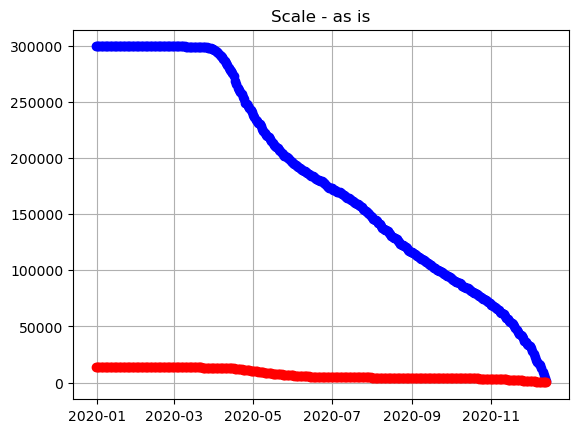

In [17]:
#plt.plot(X-axis, Y-axis)
#plt.rcParams["figure.figsize"] = (20,30)
plt.plot(data_USA["dateRep"],data_USA["cumulative_deaths"],color='blue', marker='o')
plt.plot(data_CAN["dateRep"],data_CAN["cumulative_deaths"],color='red', marker='o')
plt.title("Scale - as is")
plt.grid()
plt.show()

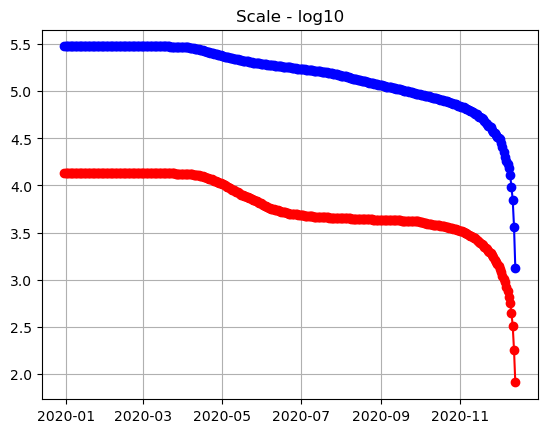

In [18]:
#plt.plot(X-axis, Y-axis)
#plt.rcParams["figure.figsize"] = (20,30)
plt.plot(data_USA["dateRep"],np.log10(data_USA["cumulative_deaths"]),color='blue', marker='o')
plt.plot(data_CAN["dateRep"],np.log10(data_CAN["cumulative_deaths"]),color='red', marker='o')
plt.title("Scale - log10")
plt.grid()
plt.show()